## **Simple CNN Implemented using Keras.**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [3]:
# Loading a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalizing and reshaping data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Defining a simple CNN model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer="adam",

  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9084 - loss: 0.2995 - val_accuracy: 0.9845 - val_loss: 0.0458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9866 - loss: 0.0426 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9914 - val_loss: 0.0252
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9880 - val_loss: 0.0330
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9930 - val_loss: 0.0246


In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9901 - loss: 0.0340
Test accuracy: 0.9930


In [12]:
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


## **Task 1: Data Understanding and Visualization:**

In [34]:
import zipfile

file_path = "/content/drive/MyDrive/AIML/FruitinAmazon.zip"
extract_path = "/content/drive/MyDrive/AIML/FruitinAmazon"

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extract to a folder


In [42]:
# Define paths
train_dir = '/content/drive/MyDrive/AIML/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/AIML/FruitinAmazon/test'

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

*   Get the list of class directories from the train folder.
*   Select one image randomly from each class.
*   Display the images in a grid format with two rows using matplotlib.

In [38]:
import os
import random
import matplotlib.pyplot as plt

def visualize_data(train_data_dir):
    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


['tucuma', 'cupuacu', 'pupunha', 'graviola', 'guarana', 'acai']


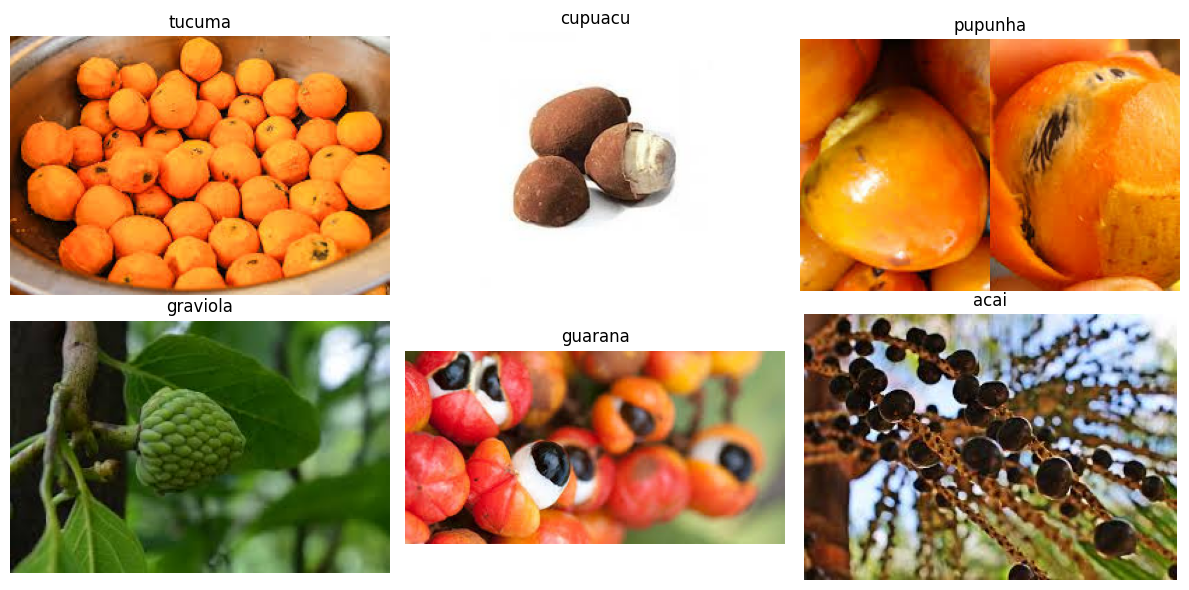

In [43]:
visualize_data(train_dir)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

Hint:
- Iterate through each class subdirectory and check if each image is valid.
- Use the Image.open() function to attempt to load each image.
- If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".
- Maintain a list of all corrupted image paths for reporting.

Expected Output: No corrupted images found.

In [44]:
import os
from PIL import Image

def check_and_remove_corrupted_images(train_folder):
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Verify image format
                        img.verify()
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images removed: {len(corrupted_images)}")


check_and_remove_corrupted_images(train_dir)

No corrupted images found.


## **Task 2: Loading and Preprocessing Image Data in keras:**

In [45]:
import tensorflow as tf
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


## **Task 3 - Implement a CNN with**

Follow the following Structure and Hyper - parameters:

Convolutional Architecture:

* Convolutional Layer 1:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 1: Max pooling
 - Filter Size (F): (2, 2)
 - Stride (s): 2
* Convolutional Layer 2:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 2: Max pooling
  - Filter Size (F): (2, 2)
  - Stride (s): 2

Fully Connected Network Architecture:
* Flatten Layer: Flatten the input coming from the convolutional layers
* Input Layer:
* Hidden Layer - 2:
  - Number of Neurons: 64
  - Number of Neurons: 128
* Output Layer:
  - Number of Neurons: num classes (number of output classes)

In [46]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax') # 6 for 6 classes of fruits
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Compile the Model**

**Model Compilation**

* Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [47]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Train the Model**

Model Training

* Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
* Use val ds for validation.

* Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,  # Use val_ds for validation
    callbacks=callbacks  # Use callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.1250 - loss: 1.8772
Epoch 1: val_loss improved from inf to 1.27607, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.1250 - loss: 1.8863 - val_accuracy: 0.8333 - val_loss: 1.2761
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.2222 - loss: 1.7609
Epoch 2: val_loss did not improve from 1.27607
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step - accuracy: 0.2396 - loss: 1.7516 - val_accuracy: 0.1667 - val_loss: 1.7324
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.3999 - loss: 1.5859
Epoch 3: val_loss did not improve from 1.27607
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.4006 - loss: 1.5809 - val_accuracy: 0.3333 - val_loss: 1.6053
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.3843 - loss: 1.4041
Epoch 4: val_loss did not improve from 1.27607
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 794ms/step - accuracy: 0.3889 - loss: 1.3980 - val_accuracy: 0.6111 - val_loss: 1.4047
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5839 - loss: 1.1337
Epoch 5: val_loss improved from 1.27607 to 0.88304, saving 

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.5907 - loss: 1.1317 - val_accuracy: 0.7778 - val_loss: 0.8830
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.6916 - loss: 0.9436
Epoch 6: val_loss did not improve from 0.88304
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.6819 - loss: 0.9446 - val_accuracy: 0.6111 - val_loss: 1.2213
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7870 - loss: 0.7553
Epoch 7: val_loss improved from 0.88304 to 0.86341, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step - accuracy: 0.7743 - loss: 0.7648 - val_accuracy: 0.8333 - val_loss: 0.8634
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8854 - loss: 0.5327
Epoch 8: val_loss improved from 0.86341 to 0.41608, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.8828 - loss: 0.5331 - val_accuracy: 0.8889 - val_loss: 0.4161
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.8854 - loss: 0.3798
Epoch 9: val_loss did not improve from 0.41608
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 836ms/step - accuracy: 0.8828 - loss: 0.3844 - val_accuracy: 0.7778 - val_loss: 0.8398
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9398 - loss: 0.2728
Epoch 10: val_loss did not improve from 0.41608
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.9410 - loss: 0.2708 - val_accuracy: 0.3889 - val_loss: 1.3291
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9196 - loss: 0.2403
Epoch 11: val_loss improved from 0.41608 to 0.40334, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.9223 - loss: 0.2328 - val_accuracy: 0.8333 - val_loss: 0.4033
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9699 - loss: 0.1326
Epoch 12: val_loss improved from 0.40334 to 0.32616, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - accuracy: 0.9705 - loss: 0.1303 - val_accuracy: 0.9444 - val_loss: 0.3262
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 1.0000 - loss: 0.0671
Epoch 13: val_loss did not improve from 0.32616
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 1.0000 - loss: 0.0675 - val_accuracy: 0.8333 - val_loss: 0.4752
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 1.0000 - loss: 0.0392
Epoch 14: val_loss did not improve from 0.32616
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - accuracy: 1.0000 - loss: 0.0395 - val_accuracy: 0.8333 - val_loss: 0.5829
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0326
Epoch 15: val_loss did not improve from 0.32616
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 0.8333 - val_loss: 0.3677
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 0.0214
Epoch 16: val_loss improved from 0.32616 to 0.29927,

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9444 - val_loss: 0.2993
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 1.0000 - loss: 0.0160
Epoch 17: val_loss did not improve from 0.29927
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.9444 - val_loss: 0.3129
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 1.0000 - loss: 0.0097
Epoch 18: val_loss did not improve from 0.29927
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 559ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.8889 - val_loss: 0.3326
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 19: val_loss did not improve from 0.29927
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 811ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8333 - val_loss: 0.3495
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 20: val_loss did not improve from 0.29927
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8889 - val_loss: 0.2989
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 24: val_loss improved from 0.29886 to 0.28965, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 922ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8889 - val_loss: 0.2897
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 1.0000 - loss: 9.6496e-04
Epoch 25: val_loss did not improve from 0.28965
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 1.0000 - loss: 9.7000e-04 - val_accuracy: 0.8889 - val_loss: 0.2953
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 8.4429e-04
Epoch 26: val_loss did not improve from 0.28965
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 1.0000 - loss: 8.5882e-04 - val_accuracy: 0.8889 - val_loss: 0.3138
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 27: val_loss did not improve from 0.28965
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8889 - val_loss: 0.3286
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 1.0000 - loss: 9.6681e-04
Epoch 28: val_loss did not impro

## **Task 5: Evaluate the Model**

**Model Evaluation**

* After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [49]:
# Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [50]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7667 - loss: 0.8573
Test Loss: 0.8573197722434998
Test Accuracy: 0.7666666507720947


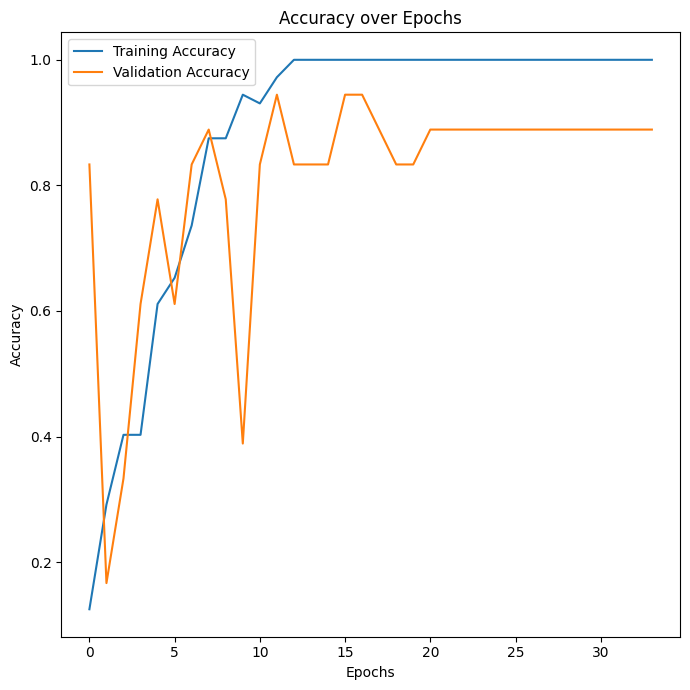

In [51]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

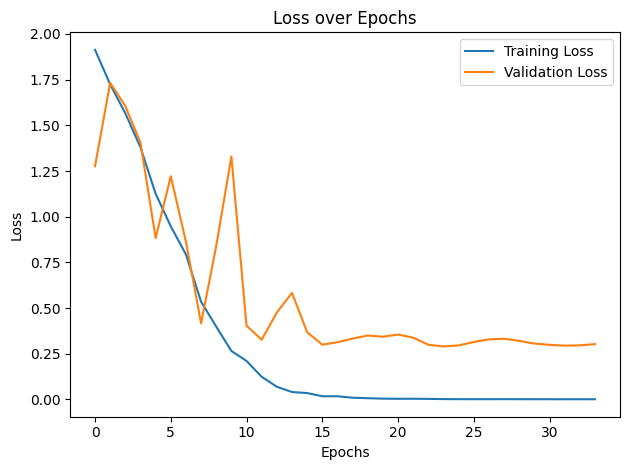

In [52]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Task 6: Save and Load the Model**

**Model Saving and Loading**

* Save the trained model to an .h5 file using model.save().
* Load the saved model and re-evaluate its performance on the test set.

1. Save The model

In [57]:
# Save the trained model to an .h5 file
model.save('my_fruit_model.h5')

2. Load the Model

In [58]:
import os
print(os.listdir("."))


['.config', 'best_model.h5', 'FruitinAmazon.zip', 'drive', 'my_fruit_model.h5', 'sample_data']


In [59]:
!ls /content/


best_model.h5  drive  FruitinAmazon.zip  my_fruit_model.h5  sample_data


In [60]:
from google.colab import files
files.download("/content/my_fruit_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# Save the model in .keras format
model.save("my_fruit_model.keras")

# Load it without needing to recompile
loaded_model = tf.keras.models.load_model("my_fruit_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [65]:
# Load the saved model
loaded_model = tf.keras.models.load_model('my_fruit_model.h5')

# Re-evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_ds)

print('Test Loss (Loaded Model):', loss)
print('Test Accuracy (Loaded Model):', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.7667 - loss: 0.8573
Test Loss (Loaded Model): 0.8573197722434998
Test Accuracy (Loaded Model): 0.7666666507720947


## **Task 7: Predictions and Classification Report**

Making Predictions

* Use model.predict() to make predictions on test images.
* Convert the model’s predicted probabilities to digit labels using np.argmax().
* Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [56]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(test_ds)

# Convert probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for images, labels in test_ds.unbatch():  # Unbatch the dataset to get individual labels
    true_labels.append(labels.numpy())  # Use append instead of extend

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5
           3       0.80      0.80      0.80         5
           4       1.00      0.80      0.89         5
           5       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.81      0.77      0.76        30
weighted avg       0.81      0.77      0.76        30

